In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration

Let's start by importing the data:

In [2]:
data = pd.read_csv("../data/eurlex/combined.csv", sep=",", quotechar="'")
data = data.astype({
    'form': 'category'
})

data['date'        ] = pd.to_datetime(data['date'        ])
data['oj_date'     ] = pd.to_datetime(data['oj_date'     ])
data['of_effect'   ] = pd.to_datetime(data['of_effect'   ])
data['end_validity'] = pd.to_datetime(data['end_validity'])

## Basic statistics

Number of documents:

In [5]:
len(data)



126472

Number of missing elements:

In [8]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
print(missing_data)

                     Count    Percent
celex                    0   0.000000
form                     0   0.000000
date                  1990   1.573471
title                    2   0.001581
oj_date               2929   2.315928
of_effect            19308  15.266620
end_validity         31480  24.890885
addressee            99080  78.341451
subject_matter       29250  23.127649
directory_codes      37753  29.850876
eurovoc_descriptors  33586  26.556076
legal_basis           9412   7.441963
relationships         1089   0.861060
text                     0   0.000000


### form

In [10]:
data['form'].describe()

count        126472
unique            1
top       Agreement
freq         126472
Name: form, dtype: object

### date

In [9]:
data['date'].describe(datetime_is_numeric=True)

count                           124482
mean     1995-03-20 02:01:34.047332096
min                1949-09-24 00:00:00
25%                1986-06-23 00:00:00
50%                1997-03-10 00:00:00
75%                2004-04-21 00:00:00
max                2013-10-04 00:00:00
Name: date, dtype: object

### title

In [11]:
data['title'].describe()

count                                                126470
unique                                               125265
top       This corrigendum does not concern the English ...
freq                                                     58
Name: title, dtype: object

### oj_date

In [13]:
data['oj_date'].describe(datetime_is_numeric=True)

count                        123543
mean     1995-03-01 20:52:19.739200
min             1952-12-30 00:00:00
25%             1986-06-21 00:00:00
50%             1997-01-25 00:00:00
75%             2004-02-27 00:00:00
max             2013-10-22 00:00:00
Name: oj_date, dtype: object

### of_effect

In [14]:
data['of_effect'].describe(datetime_is_numeric=True)

count                           107164
mean     1995-09-21 11:55:19.428166272
min                1953-01-01 00:00:00
25%                1987-10-01 00:00:00
50%                1997-06-24 00:00:00
75%                2004-05-07 00:00:00
max                2017-01-01 00:00:00
Name: of_effect, dtype: object

### end_validity

In [15]:
data['end_validity'].describe(datetime_is_numeric=True)

count                            94992
mean     2032-05-06 06:13:50.419403264
min                1954-01-07 00:00:00
25%                1988-03-01 00:00:00
50%                2002-01-29 12:00:00
75%                2100-01-01 00:00:00
max                2100-01-01 00:00:00
Name: end_validity, dtype: object

### addressee

In [16]:
data['addressee'].describe()

count                 27392
unique                 2788
top       The Member States
freq                  11771
Name: addressee, dtype: object

## Histogram Date

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

import csv

In [2]:
f = open("../data/eurlex/filtered.csv", "r")
r = csv.reader(f, quotechar="'")
columns = next(r)
celex_idx = columns.index("celex")
date_idx = columns.index("date")

Failed to find date for 5906 documents


min=1949-09-24
max=2013-10-04


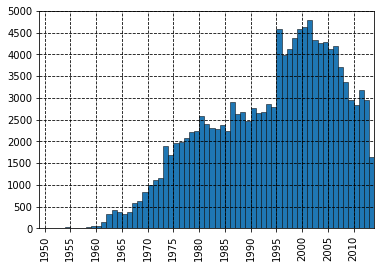

In [3]:
dates = []
mpl_dates = []

no_date = 0
for row in r:
    d = row[date_idx]
    d2 = row[date_idx]
    if d != "":
        dates.append(d)
        mpl_dates.append(mdates.datestr2num(d))
    else:
        no_date += 1

print(f'Failed to find date for {no_date} documents', file=sys.stderr)

print(f'min={min(dates)}')
print(f'max={max(dates)}')

# the histogram of the data
fig, ax = plt.subplots(1,1)
plt.grid(linestyle='dashed', axis="x", color=(0, 0, 0, 0.25), zorder=-1)
plt.grid(linestyle='dashed', axis="y", color=(0, 0, 0, 0.25), zorder=1)
ax.hist(mpl_dates, bins=65, edgecolor='black', linewidth=0.5, range=(mdates.datestr2num("1949-01-01"), mdates.datestr2num("2014-01-01")), zorder=0)
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 5000])
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500))
plt.show()

## Histogram Type - to fix

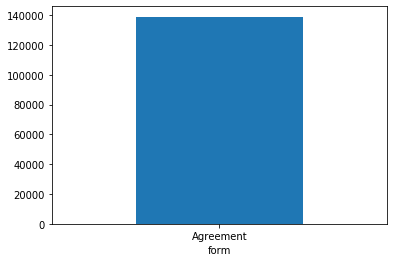

In [4]:
df = pd.read_csv("../data/eurlex/filtered.csv", sep=",", quotechar="'")


df.groupby('form').size().plot(kind='bar', rot=0)

## Histogram Subject - to fix

In [18]:
df = pd.read_csv("../data/eurlex/filtered.csv", sep=",", quotechar="'")

# df.groupby('subject_matter').size(3).plot(kind='bar', rot=0)
df['subject_matter'].value_counts()[df['subject_matter'].value_counts().head(10)].index

Index(['Accession;Common customs tariff;Protective measures',
       'Development cooperation;External relations;public health',
       'African Caribbean and Pacific States;common commercial policy;Provisions under Article 235 EEC',
       'Agriculture;CCT: franchise;Provisions under Article 235 EEC',
       'Environment;Foodstuffs;Plant health legislation',
       'Coordination of structural instruments;economic;European Social Fund;social and territorial cohesion',
       'common commercial policy;Hops',
       'Agricultural structures;Agriculture;Regional policy',
       'objectives and tasks of the Treaties;Principles;Social provisions',
       'Energy;Provisions under Article 235 EEC;Research and training'],
      dtype='object')